## <font color='yellow'>Fundamentos de Linguagem Python Para An√°lise de Dados e Data Science</font>

## <font color='yellow'>Introdu√ß√£o a Deep Learning com TensorFlow</font>

**Problema de Neg√≥cio:** Construir um modelo de Intelig√™ncia Artificial capaz de classificar imagens. 
Vejamos um exemplo com essas 10 categorias: ['`airplane`', '`automobile`', '`bird`', '`cat`', '`deer`', '`dog`', '`frog`', '`horse`', '`ship`', '`truck`']. 
Dada uma nova imagem de uma dessas categorias, o modelo deve ser capaz de classificar e indicar o que √© a imagem.

### <font color=orange>Verificar a Vers√£o da Linguagem Python</font>

* Esse c√≥digo Python exibe a vers√£o da linguagem Python que est√° sendo usada no ambiente do Jupyter Notebook. Ele importa a fun√ß√£o `python_version` do m√≥dulo `platform` e, em seguida, imprime a vers√£o do Python. Isso √© √∫til para verificar a vers√£o da linguagem e garantir que seu c√≥digo seja compat√≠vel com essa vers√£o espec√≠fica.

In [1]:
from platform import python_version
print('Vers√£o da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Vers√£o da Linguagem Python Usada Neste Jupyter Notebook: 3.11.3


https://www.tensorflow.org/

**ATEN√á√ÉO**: O `TensorFlow` pode apresentar problemas em algumas vers√µes de sistema operacional. Verifique a documenta√ß√£o oficial no link acima.

### <font color=orange>Instalar a biblioteca TensorFlow</font>

* Esse c√≥digo Python realiza a instala√ß√£o do `TensorFlow` na vers√£o 2.12 de forma silenciosa. O '%' antes do comando '`pip`' indica que ele est√° sendo executado em um ambiente de notebook, como Jupyter. O `TensorFlow` √© uma biblioteca de c√≥digo aberto utilizada principalmente em aprendizado de m√°quina e redes neurais, e essa linha de c√≥digo garante que a vers√£o 2.12 seja instalada no ambiente de desenvolvimento, possibilitando o uso dessa vers√£o espec√≠fica para projetos futuros.

In [2]:
%pip install -q tensorflow==2.12

Note: you may need to restart the kernel to use updated packages.


### <font color=orange>Silenciar as mensagens do TensorFlow</font>

* Esse c√≥digo Python ajusta as configura√ß√µes do `TensorFlow` para suprimir mensagens de log com n√≠vel de import√¢ncia abaixo de 3, tornando o ambiente de execu√ß√£o mais silencioso. Isso pode ser √∫til para evitar a exibi√ß√£o de mensagens informativas ou de depura√ß√£o, deixando apenas as mensagens cr√≠ticas vis√≠veis, o que √© √∫til em situa√ß√µes em que se deseja um ambiente de execu√ß√£o mais limpo e sem informa√ß√µes desnecess√°rias.

In [3]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


### <font color=orange>Efetuar a Importa√ß√£o das Bibliotecas Importantes</font>

* Esse c√≥digo Python realiza as importa√ß√µes necess√°rias para criar um modelo de rede neural usando o TensorFlow. Ele importa o `TensorFlow` e m√≥dulos espec√≠ficos, como `datasets`, `layers` e `models` para construir a rede. Al√©m disso, s√£o importadas bibliotecas para visualiza√ß√£o, manipula√ß√£o de imagens e matrizes, como o `Matplotlib` e o `NumPy`. A importa√ß√£o do `PIL` (Python Imaging Library) √© feita para lidar com imagens. No entanto, o c√≥digo n√£o define explicitamente a l√≥gica da rede neural; ele se concentra em preparar o ambiente para o desenvolvimento de modelos de machine learning.

In [4]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### <font color=orange>Carregar o conjunto de dados CIFAR-10</font>

Fonte: https://www.cs.toronto.edu/~kriz/cifar.html

* No c√≥digo apresentado, estamos carregando o conjunto de dados CIFAR-10, amplamente usado para tarefas de vis√£o computacional. As imagens de treinamento e seus r√≥tulos s√£o armazenados nas vari√°veis `train_images` e `train_labels`, enquanto as imagens de teste e seus r√≥tulos s√£o armazenados nas vari√°veis `test_images` e `test_labels`. Esse passo √© fundamental para preparar os dados para treinar e testar modelos de aprendizado de m√°quina, como redes neurais convolucionais, visando tarefas de classifica√ß√£o de imagens. √â um primeiro passo importante em projetos de processamento de imagens e vis√£o computacional.

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### <font color=orange>Listar as classes de imagens do conjunto de dados</font>

* O c√≥digo Python acima cria uma lista chamada "image_classes" que cont√©m 10 strings, representando diferentes classes de imagens, como 'avi√£o', 'autom√≥vel', 'p√°ssaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio' e 'caminh√£o'. Em seguida, ele imprime essa lista na sa√≠da, exibindo os nomes das classes de imagens. Essa lista provavelmente est√° relacionada a um problema de classifica√ß√£o de imagens, onde cada classe representa um tipo espec√≠fico de objeto a ser identificado em imagens.

In [6]:
image_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(image_classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## <font color=yellow>Pr√©-Processamento e Visualiza√ß√£o das Imagens</font>

# <font color=orange>Normalizar os valores dos pixels para padroniza√ß√£o da escala dos dados</font>

* Nesse c√≥digo Python, estamos realizando a normaliza√ß√£o dos valores dos pixels de imagens, o que √© comum em tarefas de aprendizado de m√°quina e vis√£o computacional. A opera√ß√£o divide todos os valores dos pixels nas imagens de treinamento e teste por 255. Isso resulta em escalar os valores de pixel no intervalo de 0 a 1, tornando os dados mais apropriados para processamento por algoritmos de machine learning, uma vez que garante que todos os recursos estejam na mesma escala, o que pode melhorar o desempenho do modelo.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### <font color=orange>Criar uma fun√ß√£o para exibir as imagens</font>

* O c√≥digo Python acima define uma fun√ß√£o chamada "`visualize_images`" que √© utilizada para exibir imagens em um formato de grade. A fun√ß√£o recebe duas listas, "`images`" e "`labels`", que representam imagens e r√≥tulos correspondentes. Em seguida, cria uma grade de 6x6 subplots para exibir at√© 30 imagens. Cada subplot exibe uma imagem do conjunto "`images`" com seu r√≥tulo correspondente. As configura√ß√µes visuais incluem a remo√ß√£o de marca√ß√µes nos eixos, desativa√ß√£o de grades e a exibi√ß√£o da imagem em escala de cinza. A fun√ß√£o √© √∫til para visualizar um conjunto de dados de imagens com seus r√≥tulos associados.

In [8]:
def visualize_images(images, labels):
    plt.figure(figsize = (13,13))
    for i in range(30):
        plt.subplot(6, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(image_classes[labels[i][0]])
    plt.show()

### <font color=orange>Executar a visualiza√ß√£o de imagens com os dados de treinamento</font>

* Esse c√≥digo Python realiza a visualiza√ß√£o de imagens usando os dados de treinamento. Ele chama uma fun√ß√£o chamada "`visualize_images`" e passa como par√¢metros as imagens de treinamento (`train_images`) e seus respectivos r√≥tulos (`train_labels`), possibilitando a an√°lise e compreens√£o das imagens de treinamento em um ambiente gr√°fico.

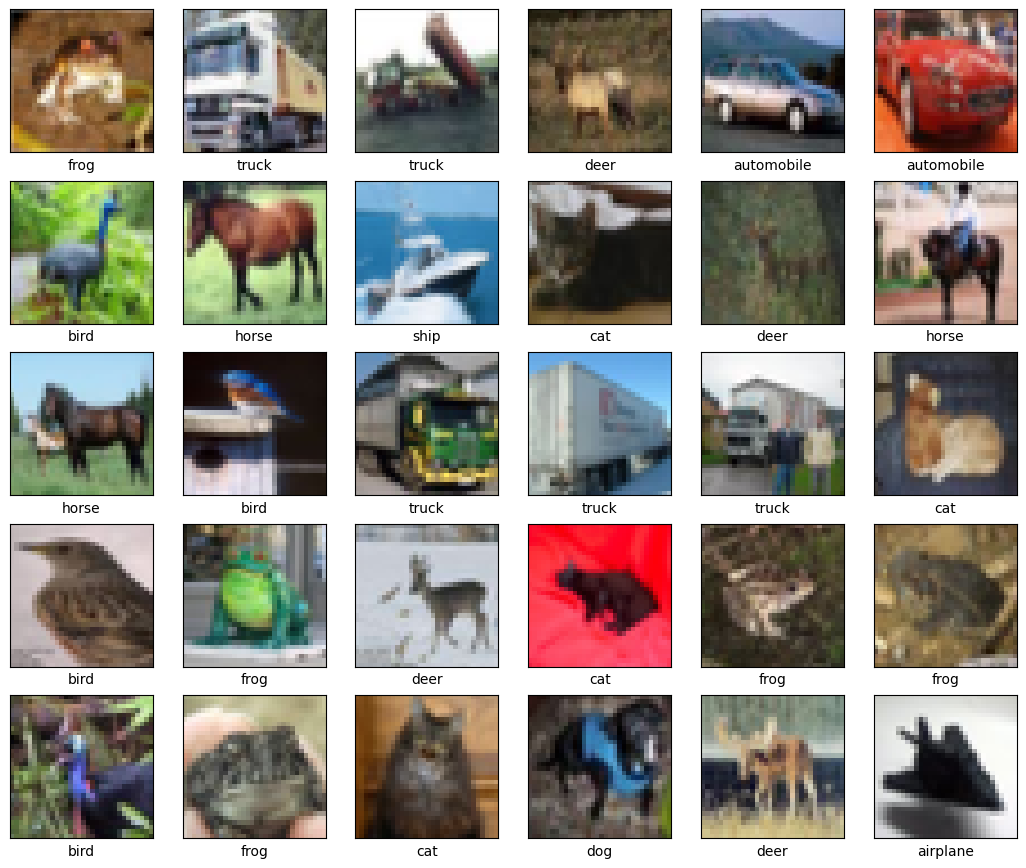

In [9]:
visualize_images(train_images, train_labels)

## <font color=orange>Constru√ß√£o do Modelo</font>

üëâ A constru√ß√£o de modelos √© discutido e explicado no site a seguir: <a href="www.deeplearningbook.com.br">www.deeplearningbook.com.br</a>

![DSA](imagens/convnet.jpg)

### <font color=orange>Criar o objeto do modelo sequencial e adicionar as camadas de convolu√ß√µes</font>

* Esse c√≥digo Python cria um modelo de rede neural convolucional (`CNN`) chamado `model_object` usando a biblioteca `Keras`. O modelo `model_object` come√ßa com uma camada de convolu√ß√£o que usa 32 filtros de 3x3 com ativa√ß√£o ReLU e especifica o formato de entrada como 32x32x3 (imagens coloridas de 32x32 pixels). Em seguida, adiciona camadas de `max pooling` para reduzir a dimensionalidade. Isso √© repetido com duas camadas adicionais de convolu√ß√£o e `max pooling`. Essas camadas s√£o essenciais para extrair caracter√≠sticas das imagens e reduzir sua resolu√ß√£o antes de alimentar a rede neural densa subsequente. Esse c√≥digo faz parte da constru√ß√£o de uma CNN para processar imagens.

In [10]:
# Cria o objeto do modelo sequencial de camadas
model_object = models.Sequential()

# Adiciona a primeira camada de convolu√ß√£o e max pooling (camada de entrada)
model_object.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_object.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolu√ß√£o e max pooling (camada intermedi√°ria)
model_object.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_object.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolu√ß√£o e max pooling (camada intermedi√°ria)
model_object.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_object.add(layers.MaxPooling2D((2, 2)))

### <font color=orange>Adicionar as camadas de classifica√ß√£o</font>

* No c√≥digo Python fornecido, estamos configurando a arquitetura de uma rede neural para classifica√ß√£o. Primeiro, usamos a fun√ß√£o "`Flatten`" para transformar os dados de entrada em um vetor unidimensional, achatando as imagens. Em seguida, adicionamos uma camada densa com 64 neur√¥nios e a fun√ß√£o de ativa√ß√£o '`relu`', que ajuda a aprender padr√µes complexos nos dados. Finalmente, acrescentamos outra camada densa com 10 neur√¥nios e a fun√ß√£o de ativa√ß√£o '`softmax`', que √© comumente usada em problemas de classifica√ß√£o, para produzir probabilidades de pertencer a cada uma das 10 classes de sa√≠da. Essas camadas juntas formam a estrutura da rede neural para o problema de classifica√ß√£o.

In [11]:
model_object.add(layers.Flatten())
model_object.add(layers.Dense(64, activation = 'relu'))
model_object.add(layers.Dense(10, activation = 'softmax'))

### <font color=orange>Exibir o resumo do modelo</font>

* O c√≥digo Python exibe um resumo do modelo, fornecendo informa√ß√µes detalhadas sobre a arquitetura, as camadas e o n√∫mero de par√¢metros do modelo definido anteriormente. Isso √© √∫til para avaliar a estrutura da rede neural e entender sua complexidade, o que √© fundamental no desenvolvimento de aplicativos de aprendizado de m√°quina, permitindo ajustes e otimiza√ß√µes com base no resumo gerado.

In [12]:
model_object.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

### <font color=orange>Efetuar a compila√ß√£o do modelo criado</font>

* Neste trecho de c√≥digo Python, estamos realizando a compila√ß√£o de um modelo de aprendizado de m√°quina. Utilizamos o otimizador '`adam`' para ajustar os pesos da rede neural, a fun√ß√£o de perda '`sparse_categorical_crossentropy`' para calcular o erro entre as previs√µes do modelo e os r√≥tulos reais, e as m√©tricas '`accuracy`' para avaliar o desempenho do modelo com base na precis√£o. Isso prepara o modelo para o treinamento, permitindo que ele aprenda a partir dos dados de treinamento e seja avaliado com base na acur√°cia.

In [13]:
model_object.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### <font color=orange>Executar o treinamento do modelo de Machine Learning criado</font>

* Nesse trecho de c√≥digo Python, estamos medindo o tempo de execu√ß√£o da fun√ß√£o '`model_object.fit()`', que √© usada para treinar um modelo de machine learning. Estamos passando as imagens de treinamento e suas respectivas etiquetas, definindo 10 √©pocas de treinamento e tamb√©m especificando os dados de valida√ß√£o com imagens de teste e suas etiquetas. Isso √© √∫til para acompanhar o desempenho do modelo durante o treinamento e validar sua precis√£o. A fun√ß√£o '`%%time`' √© uma m√°gica do Jupyter Notebook que nos permite medir o tempo gasto na execu√ß√£o desse bloco de c√≥digo.

In [14]:
%%time
historical_training = model_object.fit(
    train_images, train_labels, 
    epochs = 10, 
    validation_data = (test_images, test_labels)
)

Epoch 1/10
1563/1563 [==============================] - 172s 99ms/step - loss: 1.5330 - accuracy: 0.4411 - val_loss: 1.2545 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.1824 - accuracy: 0.5835 - val_loss: 1.1882 - val_accuracy: 0.5768
Epoch 3/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.0367 - accuracy: 0.6365 - val_loss: 1.0545 - val_accuracy: 0.6356
Epoch 4/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.9453 - accuracy: 0.6692 - val_loss: 0.9443 - val_accuracy: 0.6693
Epoch 5/10
1563/1563 [==============================] - 146s 94ms/step - loss: 0.8751 - accuracy: 0.6955 - val_loss: 0.9262 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.8116 - accuracy: 0.7182 - val_loss: 0.9042 - val_accuracy: 0.6882
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7648 - accuracy: 0.7325 - val_loss: 0

### <font color=orange>Avaliar o modelo treinado</font>

* Esse trecho de c√≥digo em Python realiza a avalia√ß√£o de um modelo previamente treinado. Ele calcula o erro e a precis√£o do modelo ao utilizar um conjunto de dados de teste, representado por '`test_images`' e '`test_labels`'. O resultado √© armazenado nas vari√°veis '`test_error`' e '`test_accuracy`', que representam o erro do teste e a precis√£o, respectivamente. O par√¢metro '`verbose=2`' controla a exibi√ß√£o do processo de avalia√ß√£o, onde '`2`' indica um n√≠vel mais detalhado de exibi√ß√£o.

In [15]:
test_error, test_accuracy = model_object.evaluate(test_images, test_labels, verbose=2)

313/313 - 16s - loss: 0.8665 - accuracy: 0.7100 - 16s/epoch - 50ms/step


### <font color=orange>Imprimir a acur√°cia dos dados de teste</font>

* O trecho de c√≥digo Python exibe a precis√£o, denominada acur√°cia, dos dados de teste por meio do comando print. A express√£o '`\nAcur√°cia com Dados de Teste:`' √© utilizada como r√≥tulo para identificar o tipo de informa√ß√£o que ser√° apresentada, seguida pela vari√°vel `test_accuracy`, que presumivelmente cont√©m o valor da acur√°cia calculada previamente. Este comando imprime na tela a mensagem "Acur√°cia com Dados de Teste:" seguida do valor armazenado na vari√°vel `test_accuracy`, fornecendo uma vis√£o r√°pida da precis√£o do modelo em rela√ß√£o aos dados de teste.

In [17]:
print('\nAcur√°cia com Dados de Teste:', test_accuracy)


Acur√°cia com Dados de Teste: 0.7099999785423279


## <font color=yellow>Deploy do Modelo</font>

### <font color=orange>Carregar uma nova imagem</font>

* O c√≥digo Python acima carrega uma nova imagem chamada "`nova_imagem.jpg`" localizada na pasta "`dados`". Para fazer isso, ele utiliza a biblioteca PIL (Pillow) para abrir a imagem, tornando-a dispon√≠vel para manipula√ß√£o posterior no programa.

In [18]:
new_image = Image.open("dados/nova_imagem.jpg")

### <font color=orange>Exibir as dimens√µes da imagem em pixels</font>

* O c√≥digo em Python utiliza o m√©todo "`size`" em um objeto representando uma imagem para obter suas dimens√µes em pixels. O resultado, presumivelmente armazenado na vari√°vel "`new_image`," fornece as informa√ß√µes sobre a largura e altura da imagem. Essa abordagem simples e direta √© √∫til para extrair detalhes cruciais da imagem, facilitando opera√ß√µes subsequentes no desenvolvimento de solu√ß√µes relacionadas a processamento de imagens.

In [19]:
new_image.size

(1919, 1199)

### <font color=orange>Obter e exibir as dimens√µes de uma imagem em pixels</font>

* O c√≥digo em Python acima destina-se a obter e exibir as dimens√µes de uma imagem em pixels. Utiliza-se o objeto '`new_image`' para extrair as informa√ß√µes de largura e altura, armazenando-as nas vari√°veis '`width_image`' e '`height_image`'. Em seguida, as dimens√µes s√£o apresentadas na tela por meio de comandos de impress√£o, informando a largura e altura da imagem. Esse trecho de c√≥digo √© √∫til para an√°lise e manipula√ß√£o de imagens, fornecendo de forma clara as informa√ß√µes cruciais sobre suas dimens√µes.

In [30]:
width_image = new_image.width
height_image = new_image.height

print("A largura da imagem √©: ", width_image)
print("A altura da imagem √©: ", height_image)

A largura da imagem √©:  1919
A altura da imagem √©:  1199


### <font color=orange>Redimensionar a imagem para as novas dimens√µes de 32x32 pixels</font>

* O c√≥digo Python fornecido realiza o redimensionamento de uma imagem para as novas dimens√µes de 32x32 pixels por meio da fun√ß√£o `resize`. A vari√°vel `dimensioned_image` armazena a imagem resultante ap√≥s esse processo. O par√¢metro passado para a fun√ß√£o √© uma tupla representando as dimens√µes desejadas, neste caso, 32 pixels de largura por 32 pixels de altura. Essa opera√ß√£o √© √∫til para ajustar o tamanho da imagem conforme necess√°rio, por exemplo, em aplica√ß√µes de processamento de imagens ou vis√£o computacional.

In [31]:
dimensioned_image = new_image.resize((32, 32))

### <font color=orange>Exibir a imagem redimensionada</font>

* Nesse c√≥digo em Python, estamos utilizando a biblioteca `Matplotlib` para exibir uma imagem redimensionada. Primeiro, definimos as dimens√µes da figura como 1x1 polegadas, e em seguida, usamos a fun√ß√£o `imshow` para mostrar a imagem previamente redimensionada. As linhas `plt.xticks([])` e `plt.yticks([])` s√£o utilizadas para remover os r√≥tulos nos eixos x e y, proporcionando uma visualiza√ß√£o mais limpa. Finalmente, `plt.show()` √© empregado para exibir a imagem redimensionada na interface gr√°fica. Este c√≥digo √© √∫til ao trabalhar com visualiza√ß√£o de imagens, especialmente quando se deseja ajustar o tamanho da figura para uma apresenta√ß√£o mais esteticamente agrad√°vel.

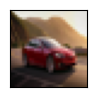

In [22]:
plt.figure(figsize = (1,1))
plt.imshow(dimensioned_image)
plt.xticks([])
plt.yticks([])
plt.show()

### <font color=orange>Converter a imagem para um array NumPy e normaliza</font>

* O trecho de c√≥digo em Python realiza a convers√£o de uma imagem para um `array` `NumPy`, representando os valores dos pixels normalizados entre 0 e 1. A vari√°vel "`new_image_array`" recebe a imagem dimensionada, e cada valor √© dividido por `255.0` para normaliza√ß√£o. Esse processo √© comum ao lidar com imagens, facilitando o processamento em algoritmos que se beneficiam de valores dentro desse intervalo.

In [35]:
new_image_array = np.array(dimensioned_image) / 255.0

### <font color=orange>Expandir as dimens√µes do array para que tenha o formato (1, 32, 32, 3)</font>

O trecho de c√≥digo em Python realiza a expans√£o das dimens√µes de um array, representado por `new_image_array`, para atender ao formato desejado de (1, 32, 32, 3). Isso √© alcan√ßado atrav√©s da utiliza√ß√£o da fun√ß√£o `np.expand_dims`, que adiciona uma dimens√£o ao array na posi√ß√£o especificada pela vari√°vel `axis`, neste caso, no eixo 0. Dessa forma, o array √© transformado em um tensor unidimensional com as dimens√µes desejadas, facilitando seu processamento em determinadas opera√ß√µes, como em modelos de redes neurais convolucionais.

In [36]:
expanded_image_array = np.expand_dims(new_image_array, axis=0)

### <font color=orange>Obter as previs√µes a partir da aplica√ß√£o de um modelo</font>

* No trecho de c√≥digo em Python fornecido, a vari√°vel "`predictions`" armazena as previs√µes obtidas a partir da aplica√ß√£o de um modelo (representado por "`model_object`") a um array de imagem expandido ("`expanded_image_array`"). Essas previs√µes s√£o resultados do processo de infer√™ncia do modelo, indicando as classifica√ß√µes ou estimativas associadas √† imagem processada. O uso da fun√ß√£o "`predict`" √© fundamental para obter insights ou realizar tarefas espec√≠ficas, dependendo da natureza do modelo, como em problemas de aprendizado de m√°quina.

In [37]:
predictions = model_object.predict(expanded_image_array)

1/1 [==============================] - 9s 9s/step


### <font color=orange>Exibir as previs√µes resultantes de algum modelo ou algoritmo</font>

* No c√≥digo fornecido, a instru√ß√£o "`print(predictions)`" exibe as previs√µes resultantes de algum modelo ou algoritmo. Essas previs√µes podem representar a sa√≠da de um modelo de aprendizado de m√°quina, por exemplo. O comando "`print`" √© utilizado para visualizar essas previs√µes na sa√≠da do console, facilitando a compreens√£o do desempenho ou resultados obtidos. Essa linha de c√≥digo √© essencial para a an√°lise e depura√ß√£o de modelos, permitindo uma r√°pida inspe√ß√£o das previs√µes geradas.

In [38]:
print(predictions)

[[5.5990811e-04 9.8901224e-01 1.2247701e-05 7.9232232e-06 8.0604804e-07
  8.2555886e-07 1.4276206e-04 1.0796369e-07 2.9375483e-04 9.9693779e-03]]


### <font color=orange>Obt√©m o √≠ndice da classe prevista com maior probabilidade e o nome correspondente</font>

* No c√≥digo Python fornecido, a vari√°vel `predicted_class_index` recebe o √≠ndice da classe prevista com a maior probabilidade a partir de um conjunto de previs√µes. Em seguida, a vari√°vel `predicted_class_name` √© usada para obter o nome da classe correspondente a esse √≠ndice. Por fim, √© exibida a mensagem indicando a classe na qual a nova imagem foi classificada, utilizando o nome da classe previamente determinado. Esse c√≥digo √© √∫til para identificar e comunicar a classe predominante na classifica√ß√£o da imagem.

In [40]:
predicted_class_index = np.argmax(predictions)
predicted_class_name = image_classes[predicted_class_index]

print("A nova imagem foi classificada como:", predicted_class_name)

A nova imagem foi classificada como: automobile
